# Test PSD - EEG & EDA

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-01\eeg\sub-01_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
595 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows


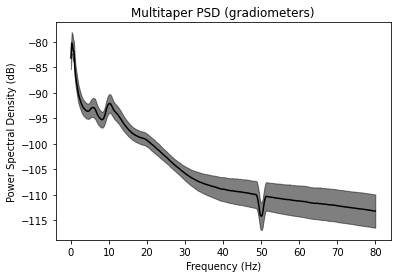

In [4]:
import mne
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


f, ax = plt.subplots()
number_subject = '01'
extension = '.fif'
directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
fname_fif = op.join(directory, 'sub-' + number_subject , 'eeg',
                    'sub-' + number_subject + '_task-rest_proc-autoreject_epo' + extension)
epochs = mne.read_epochs(fname_fif, preload=True)
psds, freqs = mne.time_frequency.psd_multitaper(epochs, fmin=0, fmax=80, n_jobs=1)
psds = 10 * np.log10(psds)  # convert to dB
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD (gradiometers)', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')
plt.show()

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-01\eeg\sub-01_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
595 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows


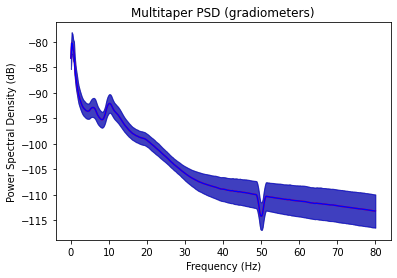

In [6]:
import mne
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


f, ax = plt.subplots()
number_subject = '01'
extension = '.fif'
directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
fname_fif = op.join(directory, 'sub-' + number_subject , 'eeg',
                    'sub-' + number_subject + '_task-rest_proc-autoreject_epo' + extension)
epochs = mne.read_epochs(fname_fif, preload=True)
psds, freqs = mne.time_frequency.psd_multitaper(epochs, fmin=0, fmax=80, n_jobs=1)
psds = 10 * np.log10(psds)  # convert to dB
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

# 
ax.plot(freqs, psds_mean, color='r')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)

ax.plot(freqs, psds_mean, color='b')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='b', alpha=.5)

ax.set(title='Multitaper PSD', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')
plt.show()

In [1]:
# Empezar aca la funcion praa obtener los indices de las epocas de EDA high y low
import datetime
import importlib
import os
import os.path as op

import h5io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from coffeine import make_filter_bank_regressor
from joblib import Parallel, delayed
from sklearn.linear_model import GammaRegressor, RidgeCV
from sklearn.model_selection import (GridSearchCV, KFold, cross_val_predict,
                                     cross_val_score)
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, quantile_transform

dataset =  'deap'
config_map = {'deap': "config_deap_eeg"}

cfg = importlib.import_module(config_map[dataset])
bids_root = cfg.bids_root
deriv_root = cfg.deriv_root
analyze_channels = cfg.analyze_channels

condition = 'rest'
feature_label = 'fb_covs'

#########  SET CONFIGS #########

# eda or emg?    
measure = 'eda'
# var or mean?   
y_stat = 'var'

DEBUG = True

################################


derivative_path = deriv_root 
pred_path = derivative_path / f'{measure}_predictions'

#%%


date = datetime.datetime.now().strftime("%d-%m--%H-%M")    
n_components = np.arange(1, 32, 1)
seed = 42
n_splits = 5
n_jobs = -1
score_name, scoring = "r2", "r2"
cv_name = '5Fold'


features_y = h5io.read_hdf5(deriv_root / f'features_EDA_{condition}.h5')

subjects = ['sub-01']

for subject in subjects:
    eda_features = [features_y[subject]]
    y = eda_features[0]['meanEDA_SMNA']

c:\Users\dadam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
len(y)

595

In [3]:
np.median(y)

24.421803023882156

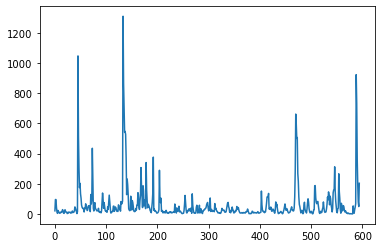

In [4]:
plt.plot(y)

In [21]:
idx_low_EDA = []
idx_high_EDA = []
for ii in range(len(y)-1):
    if y[ii] < np.percentile(y, 25):
        idx_low_EDA.append(ii)
    elif y[ii] > np.percentile(y, 75):
        idx_high_EDA.append(ii)

In [15]:
len(idx_low_EDA)

297

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-01\eeg\sub-01_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
567 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


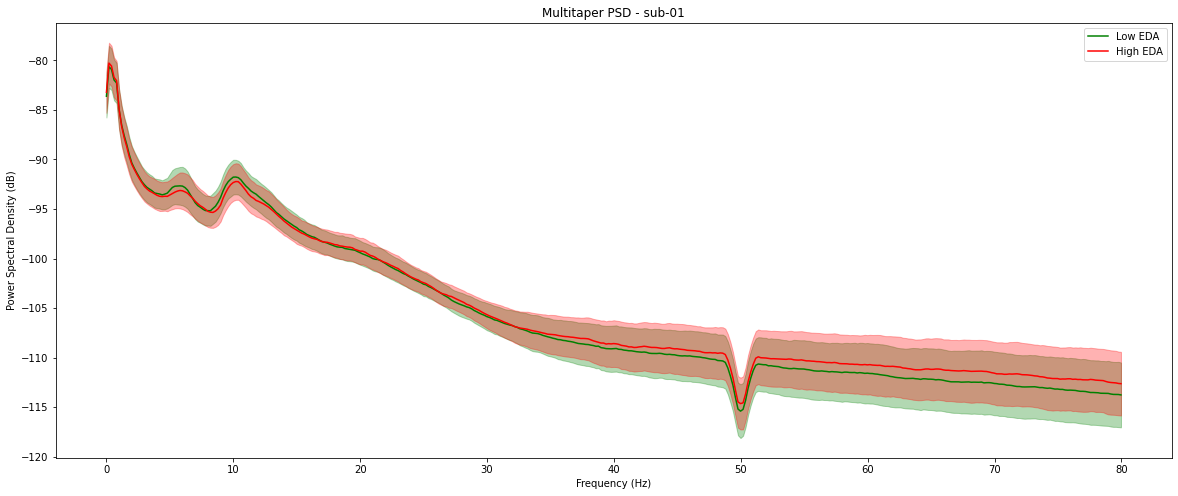

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-02\eeg\sub-02_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
490 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


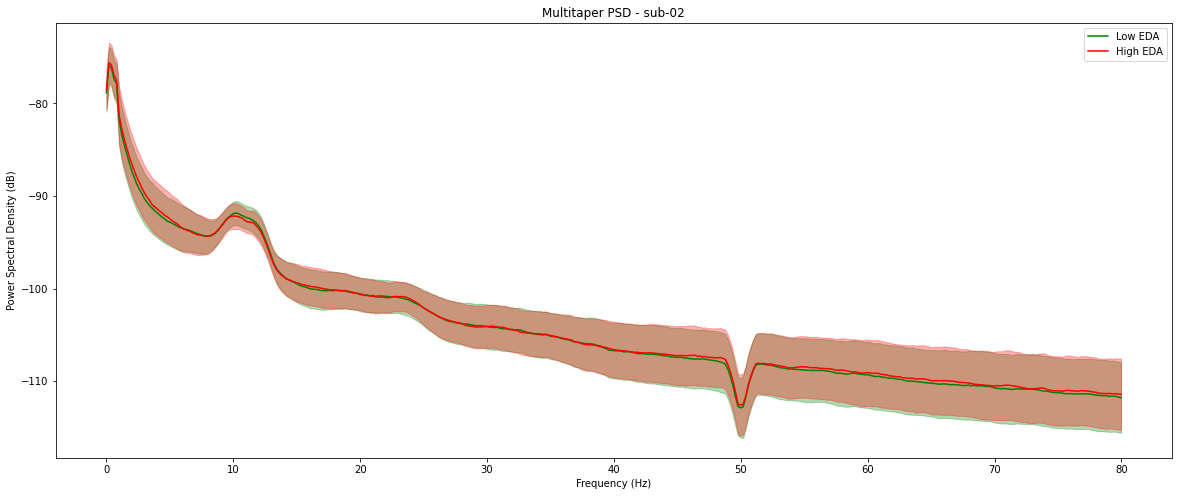

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-03\eeg\sub-03_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
503 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


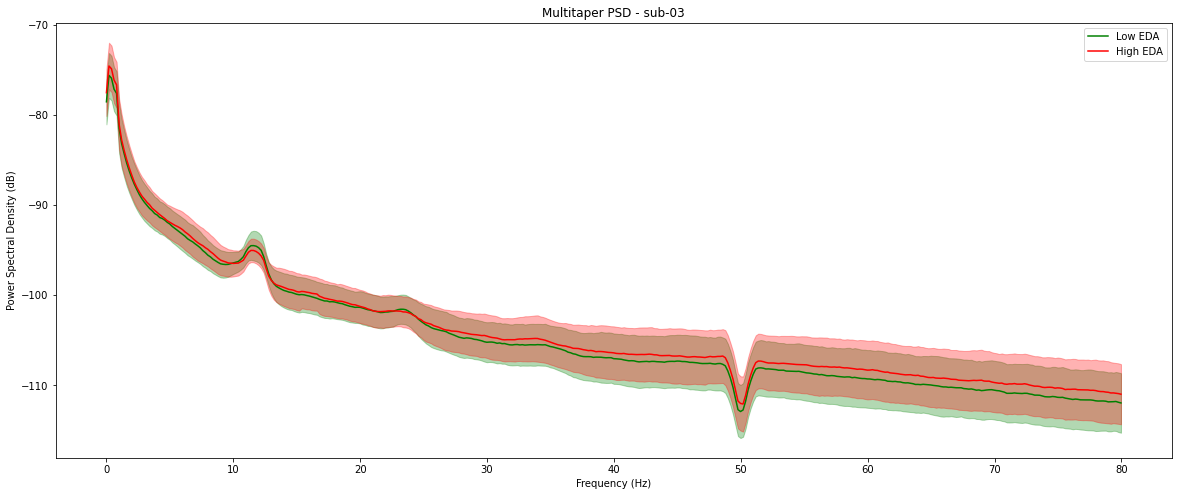

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-04\eeg\sub-04_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
590 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


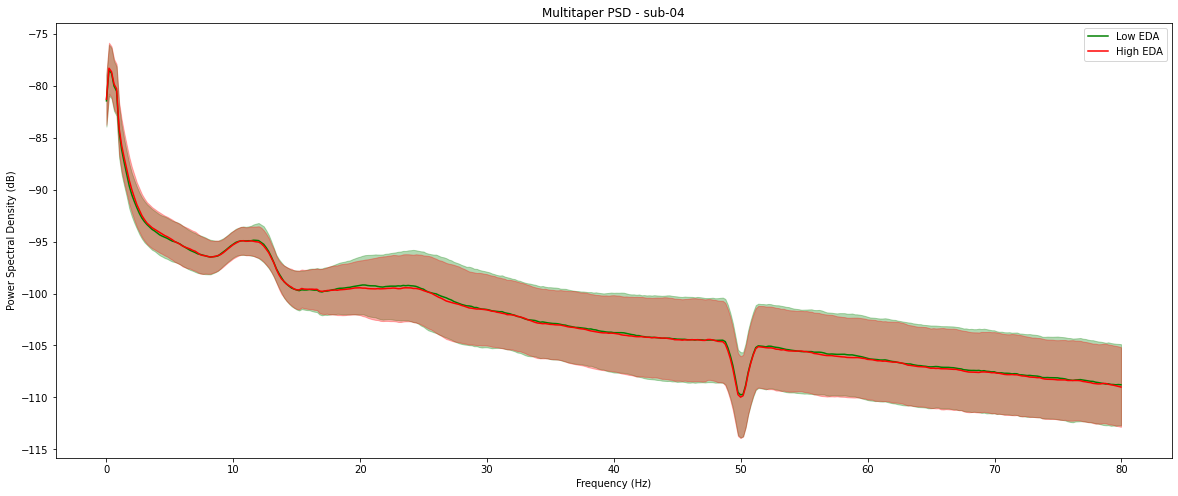

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-05\eeg\sub-05_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
568 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


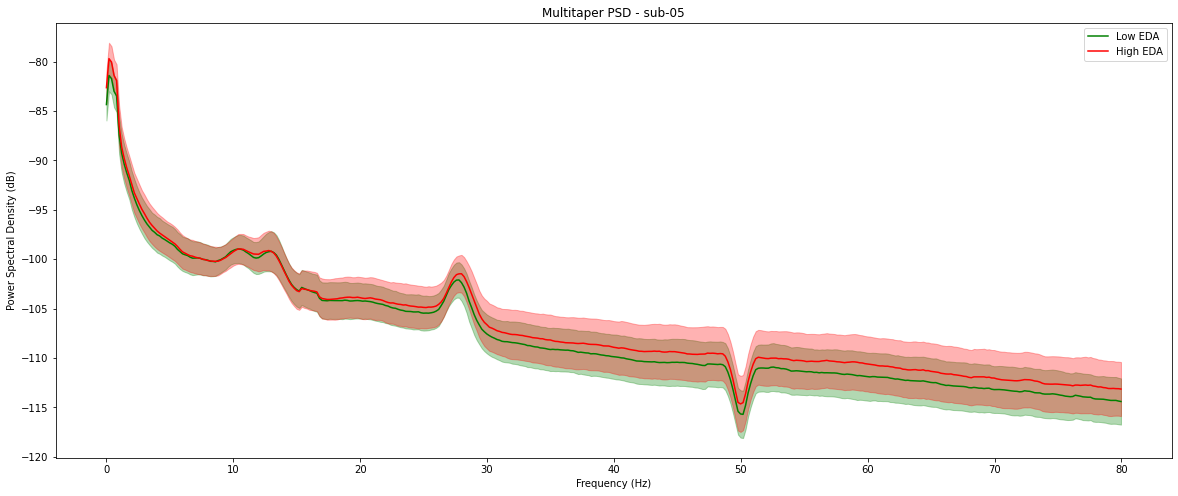

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-06\eeg\sub-06_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
592 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


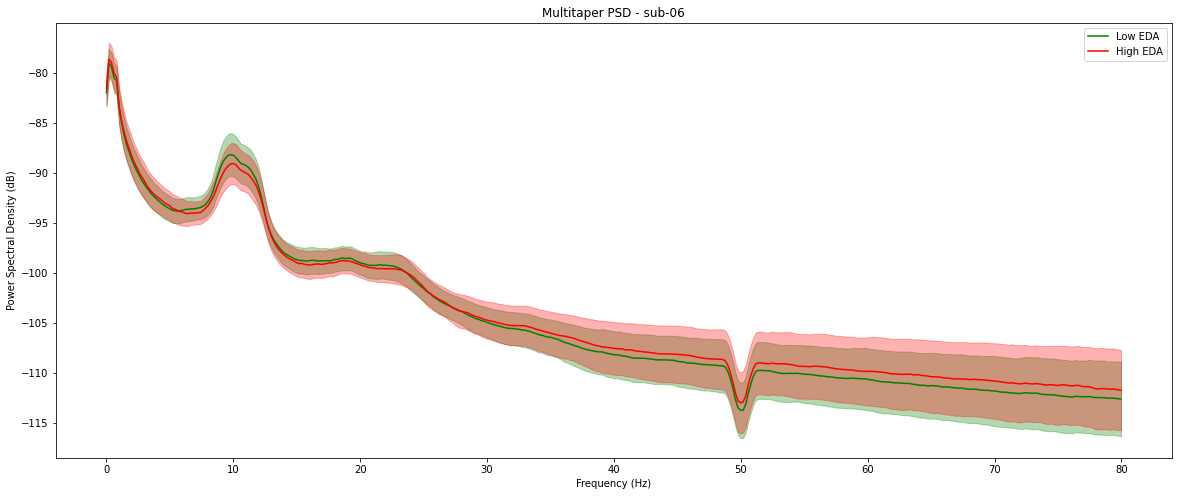

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-07\eeg\sub-07_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
592 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


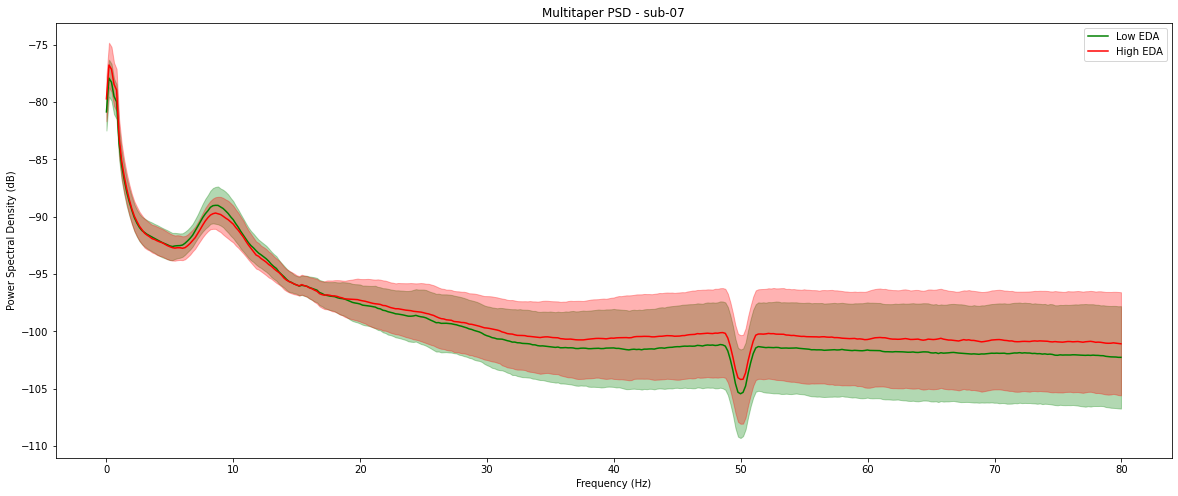

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-08\eeg\sub-08_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
234 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


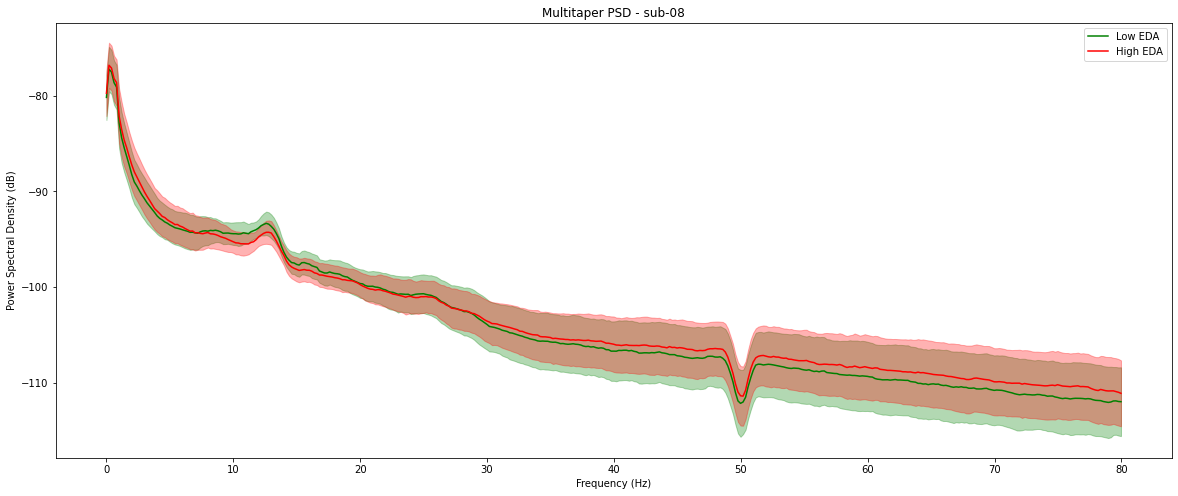

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-09\eeg\sub-09_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
591 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


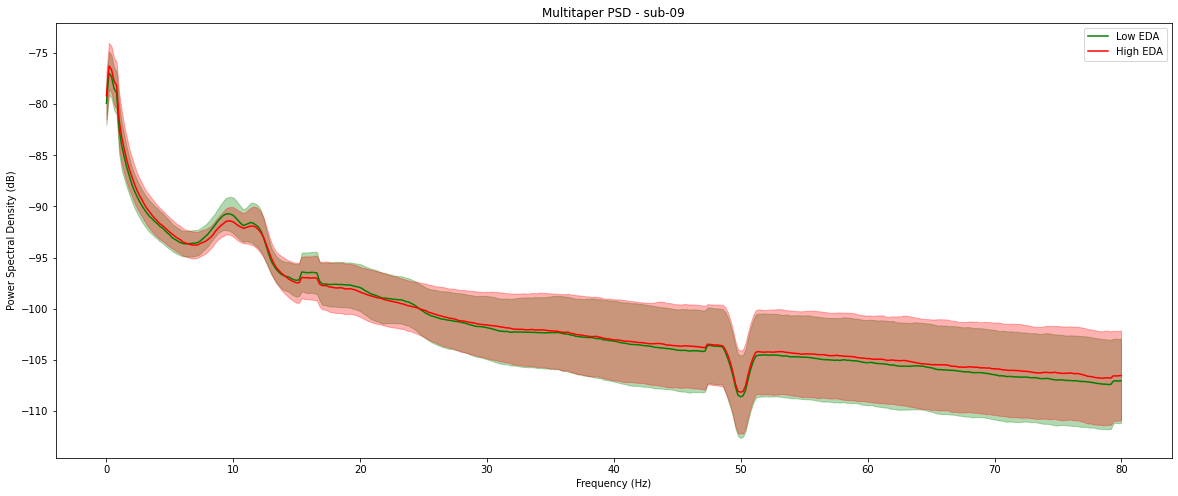

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-10\eeg\sub-10_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
600 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


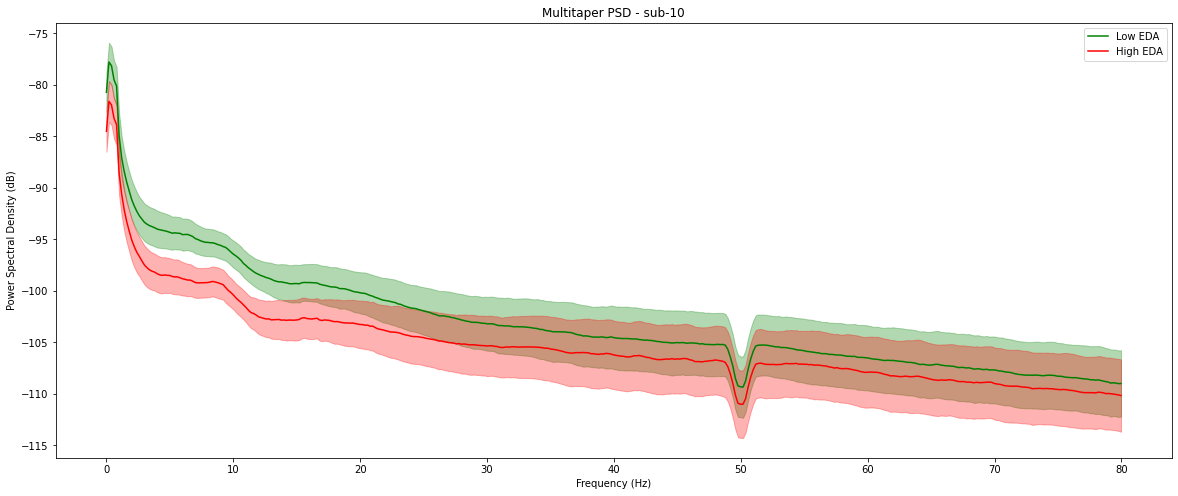

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-11\eeg\sub-11_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
600 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


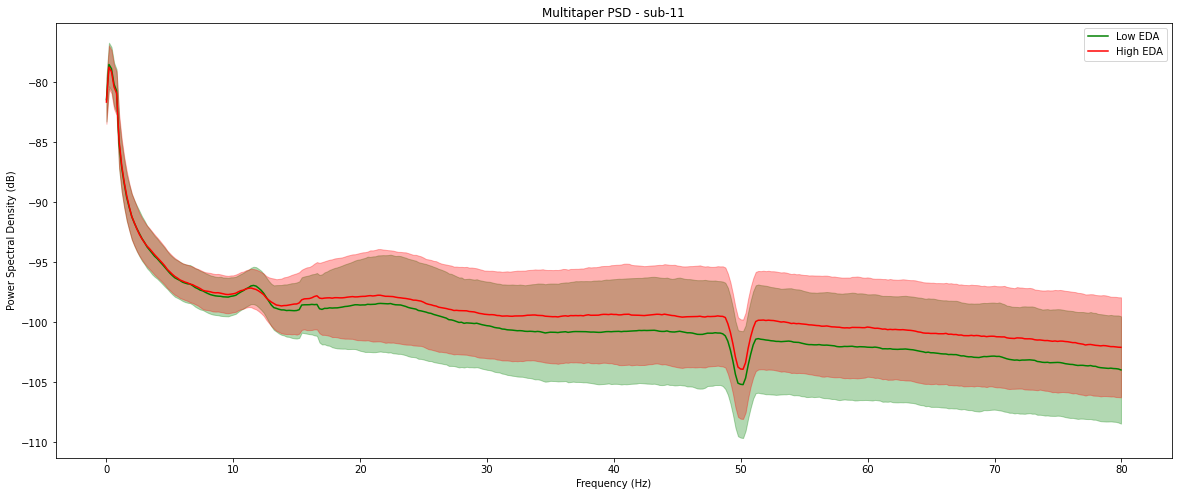

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-12\eeg\sub-12_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
599 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


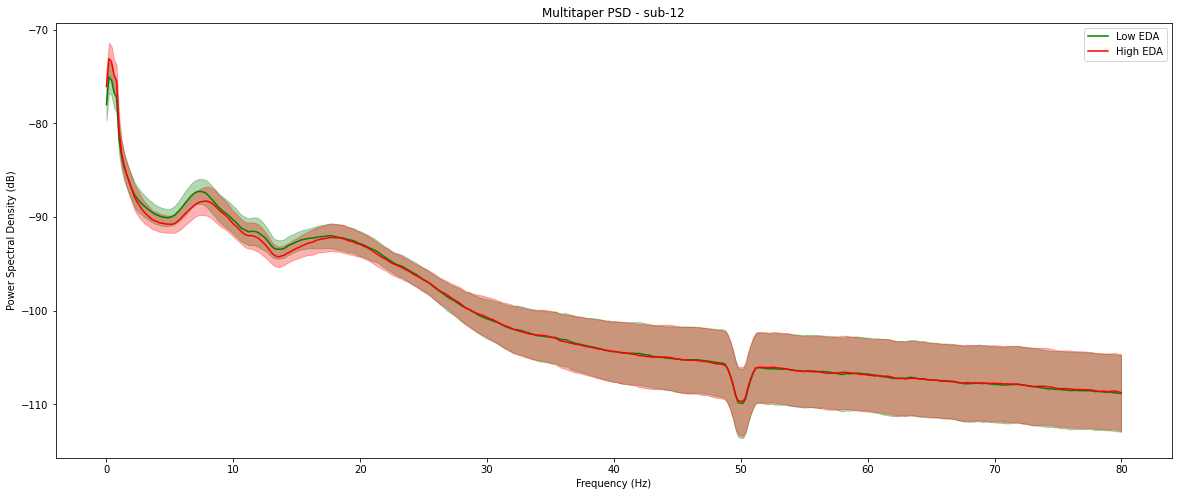

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-13\eeg\sub-13_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
601 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


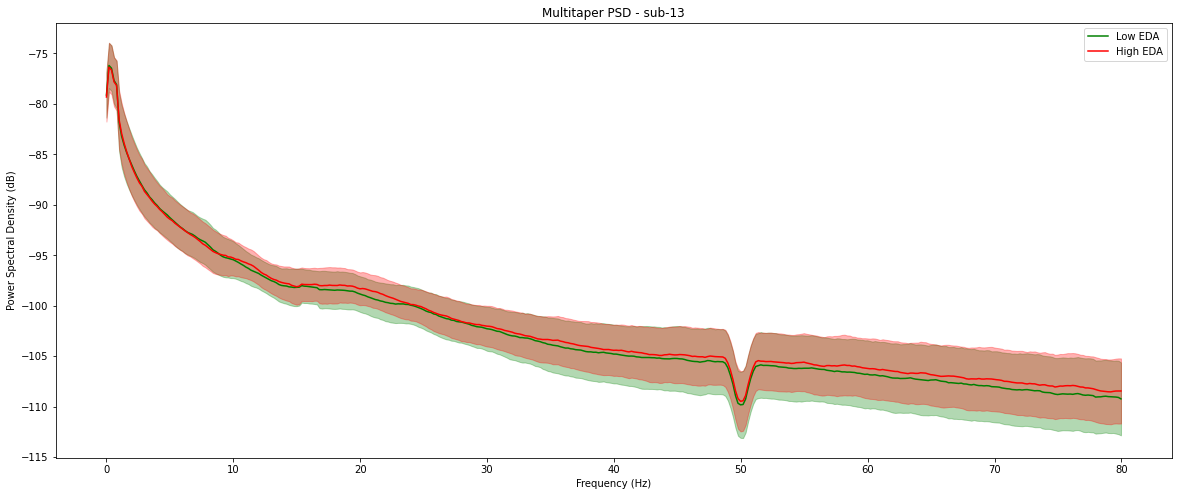

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-14\eeg\sub-14_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
604 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


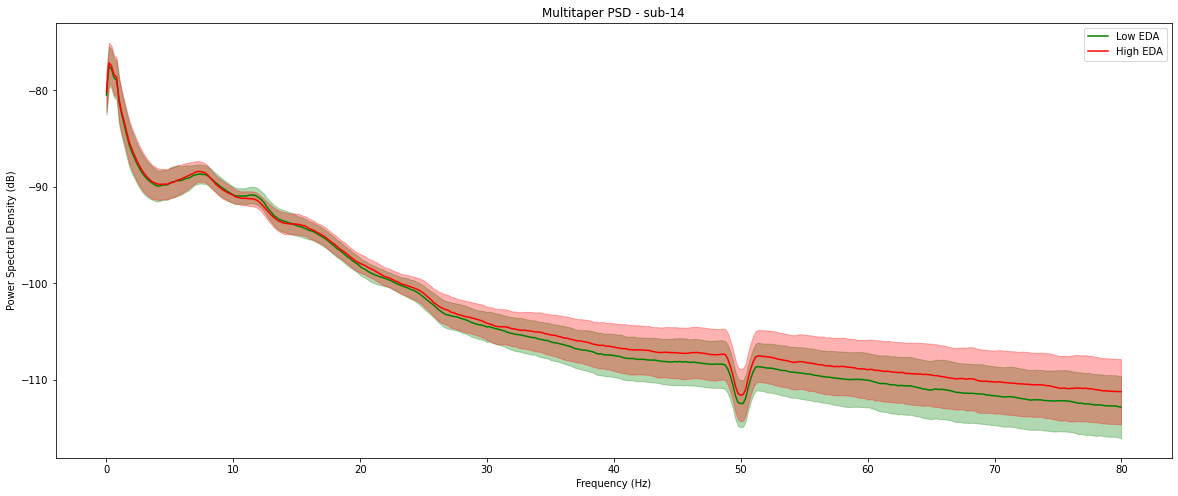

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-15\eeg\sub-15_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
320 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


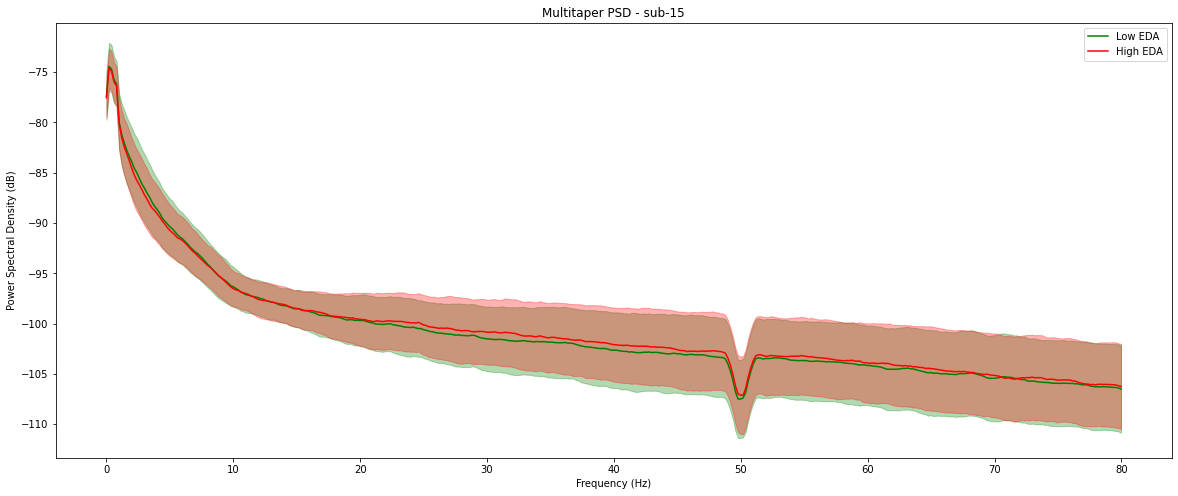

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-16\eeg\sub-16_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
410 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


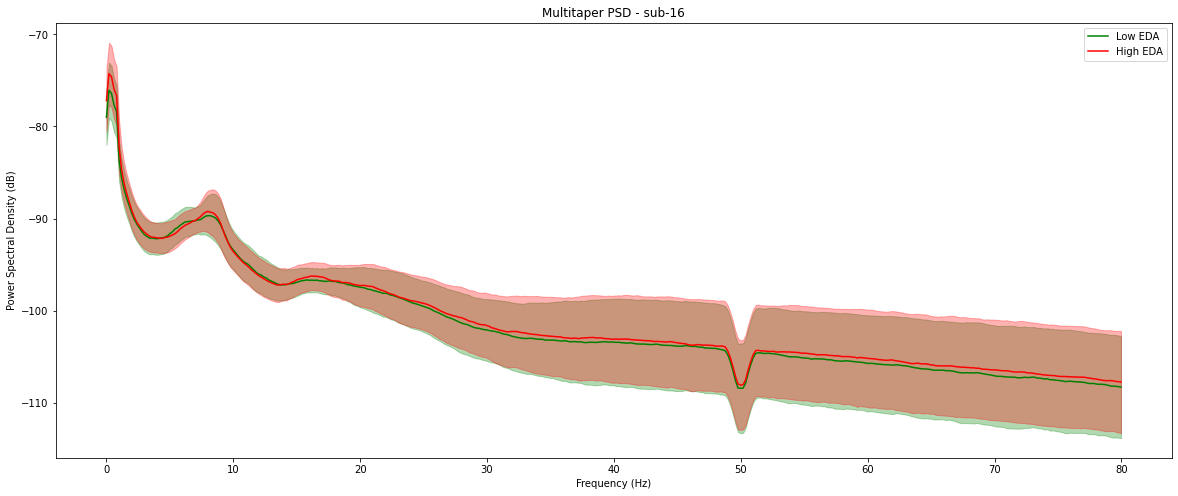

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-17\eeg\sub-17_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
151 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


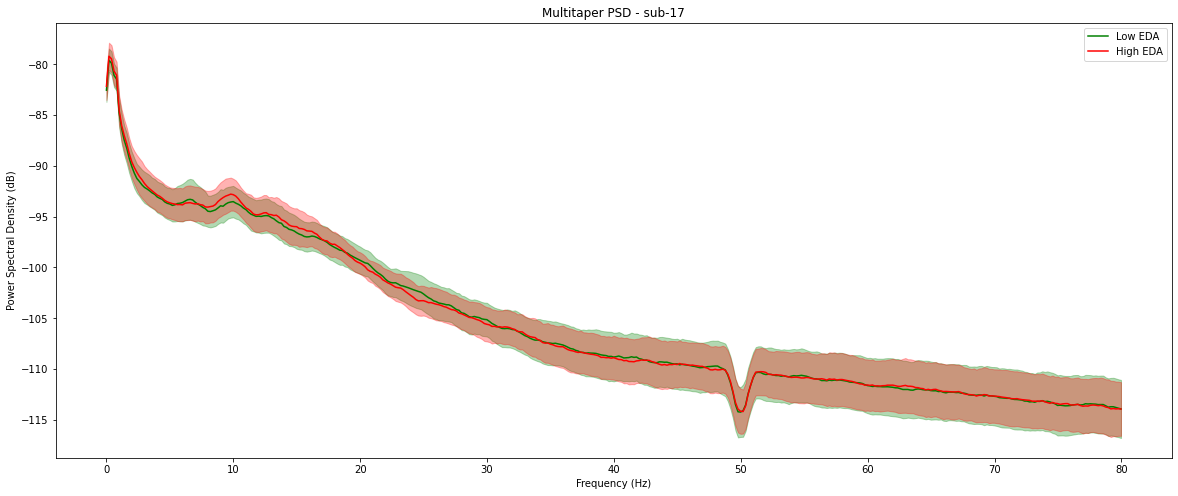

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-18\eeg\sub-18_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
585 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


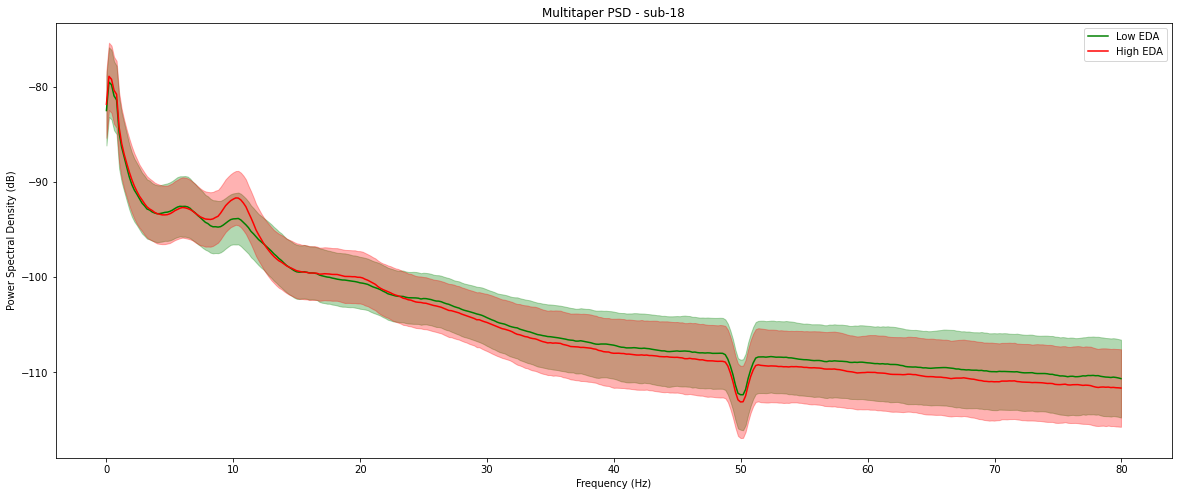

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-19\eeg\sub-19_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
579 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


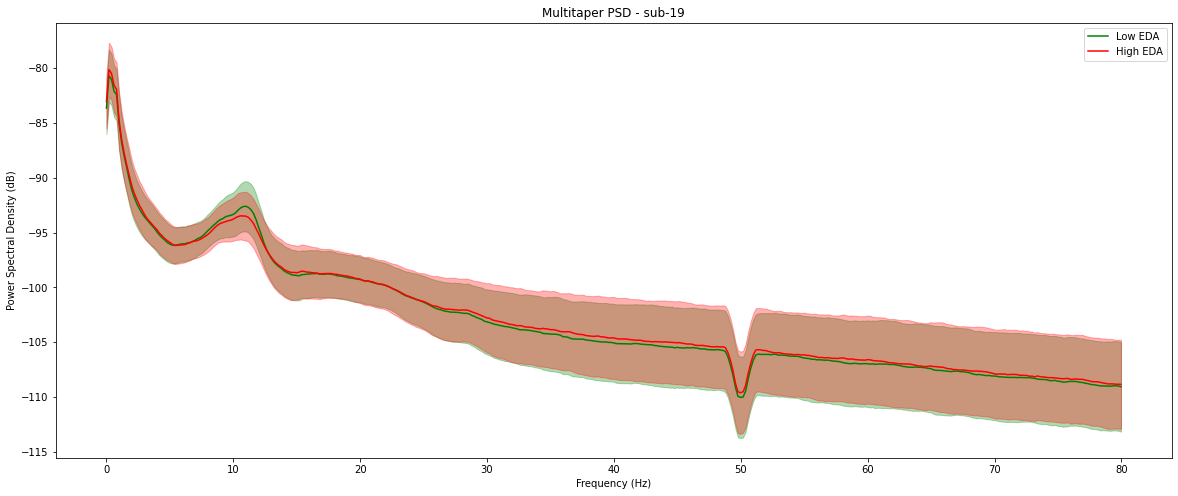

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-20\eeg\sub-20_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
580 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


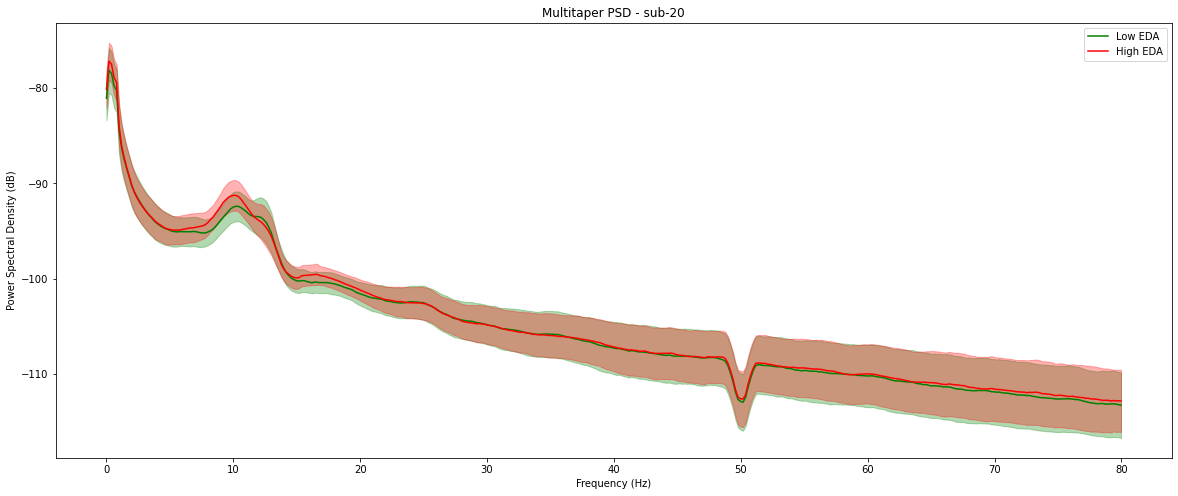

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-21\eeg\sub-21_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
601 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


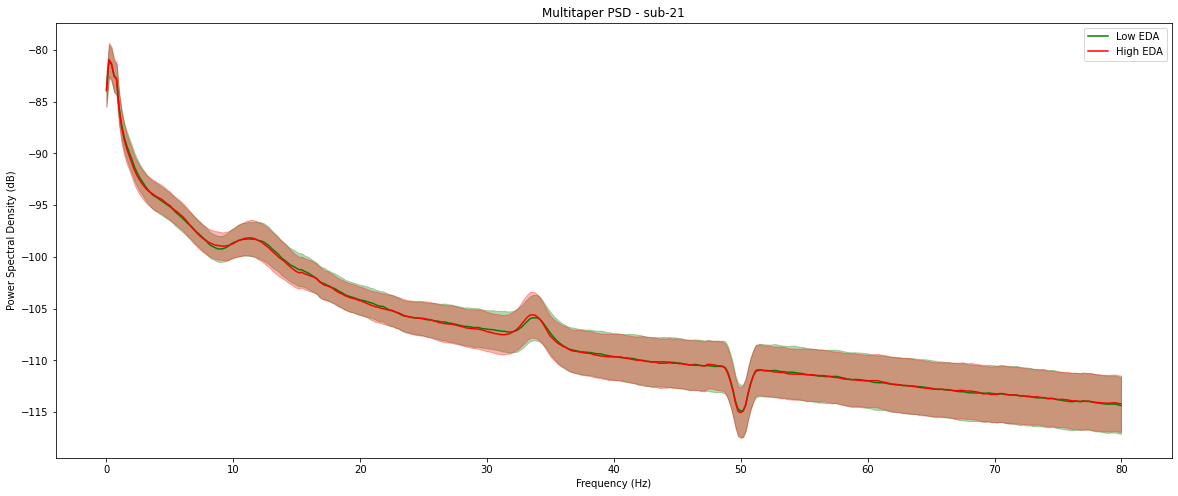

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-22\eeg\sub-22_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
525 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


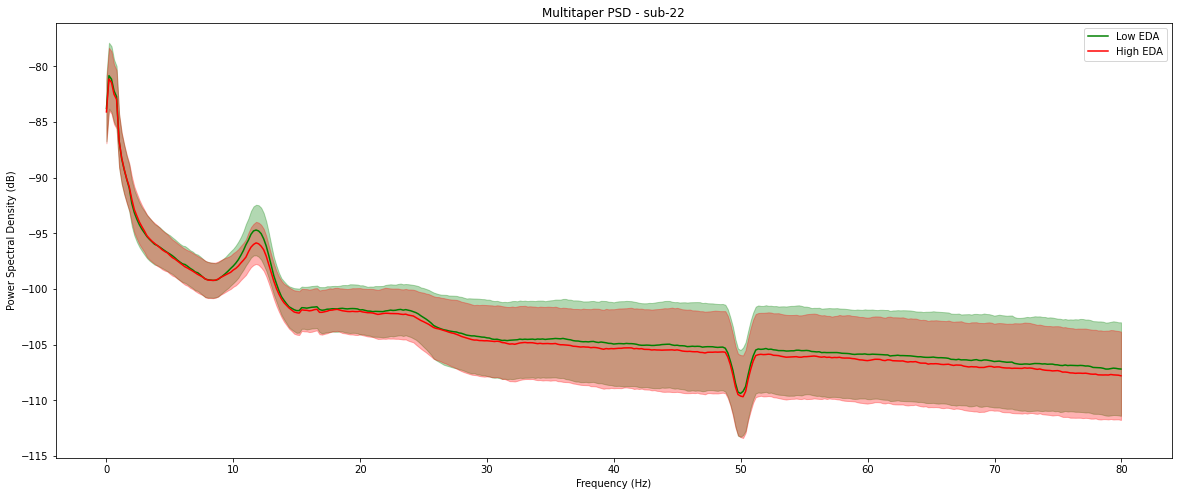

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-23\eeg\sub-23_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
598 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


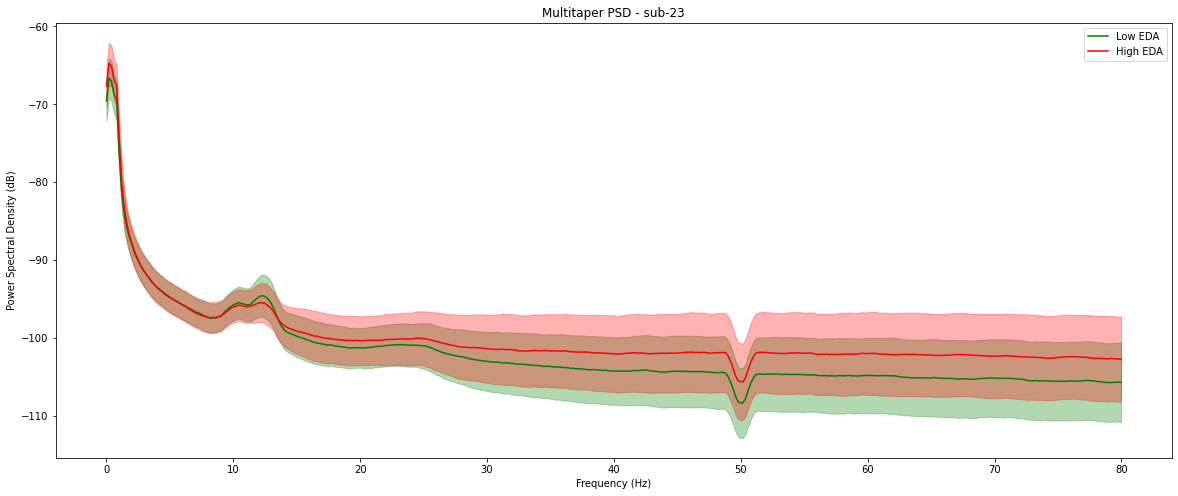

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-24\eeg\sub-24_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
565 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


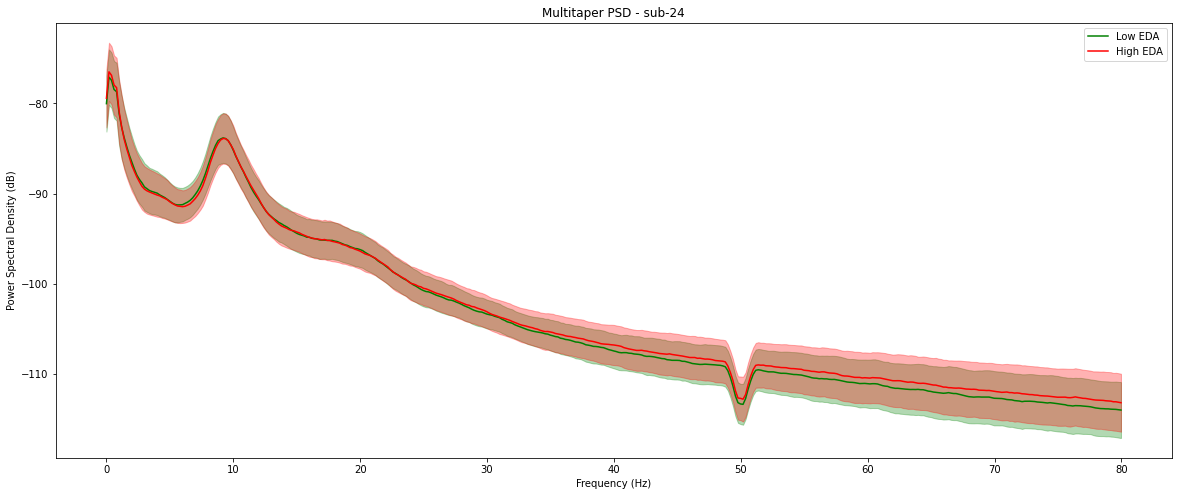

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-25\eeg\sub-25_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
312 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


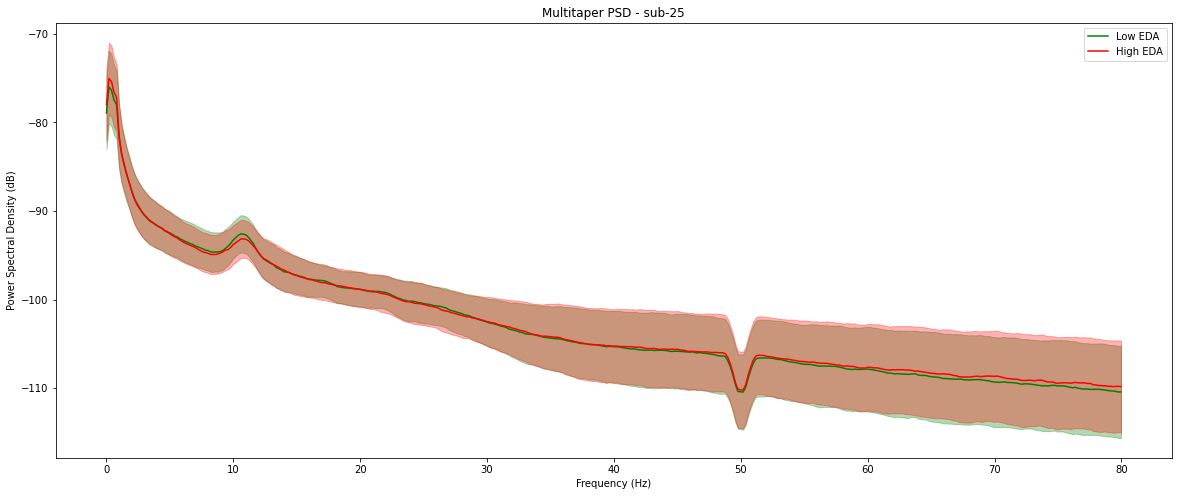

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-26\eeg\sub-26_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
149 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


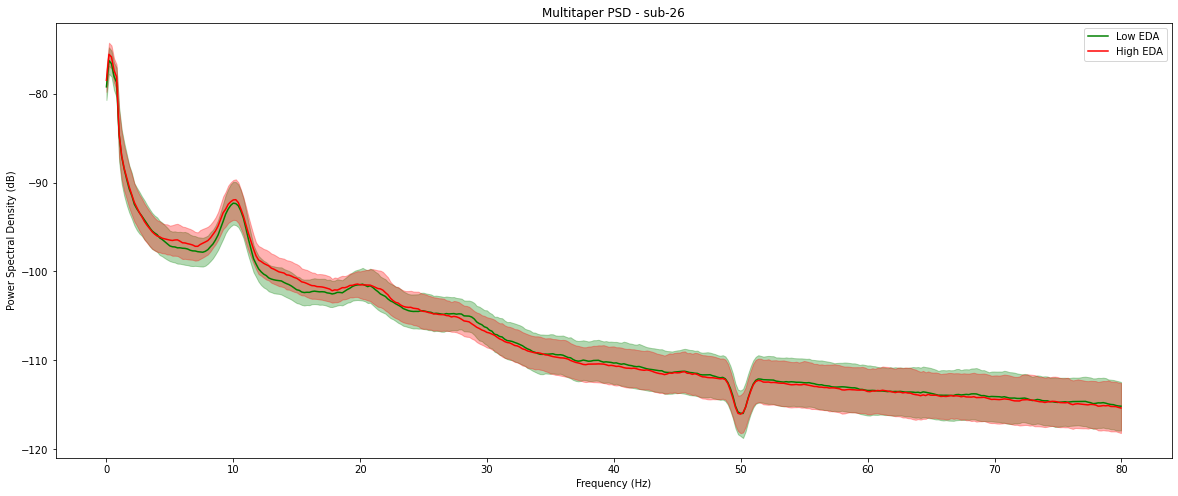

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-27\eeg\sub-27_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
593 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


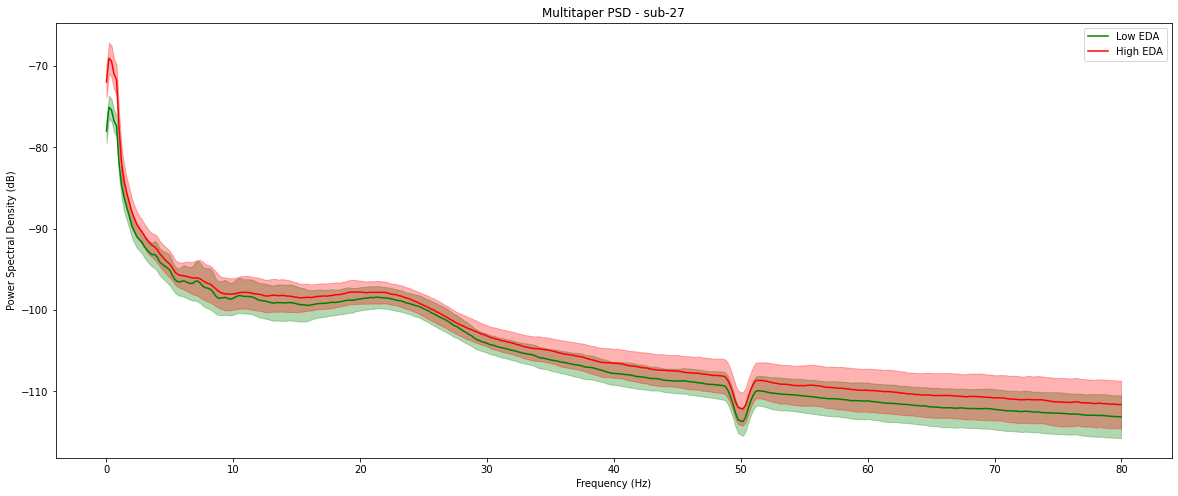

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-28\eeg\sub-28_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
457 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


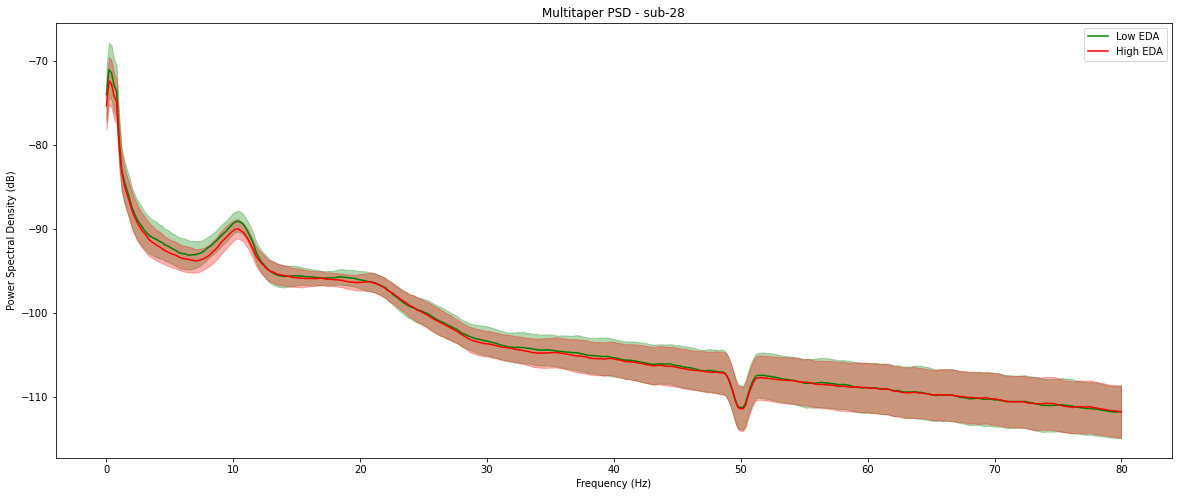

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-29\eeg\sub-29_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
567 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


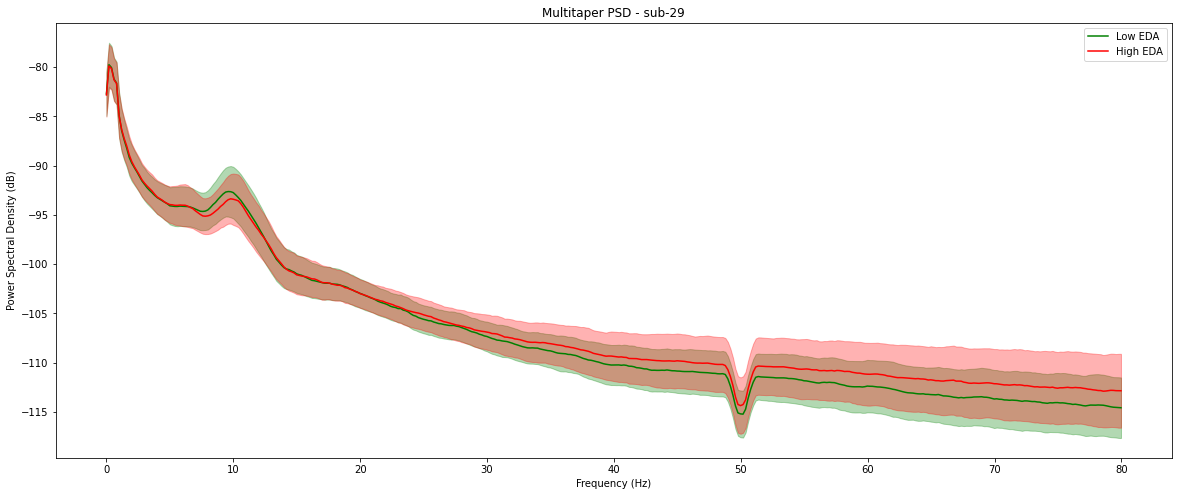

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-30\eeg\sub-30_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
359 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


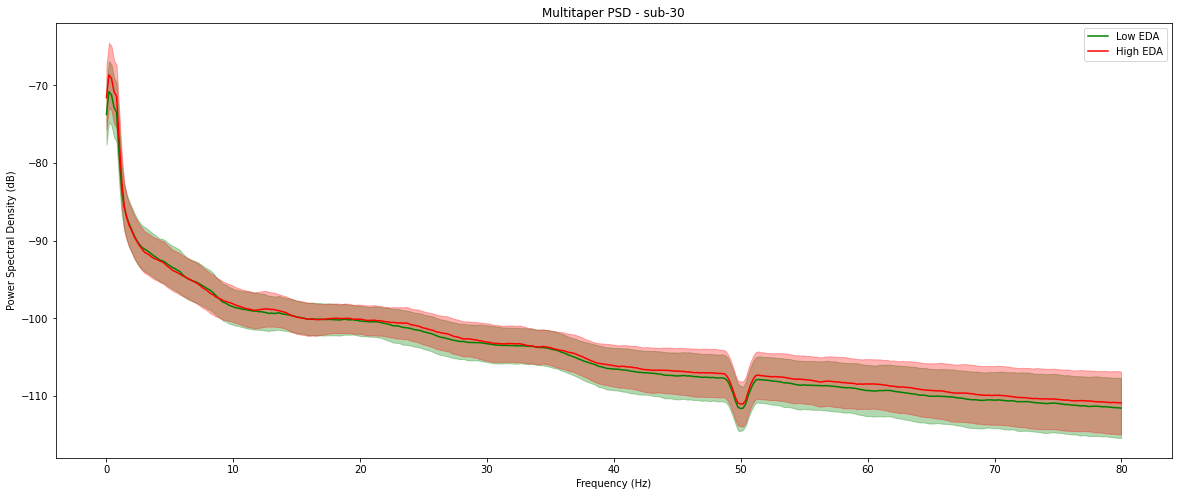

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-31\eeg\sub-31_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
526 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


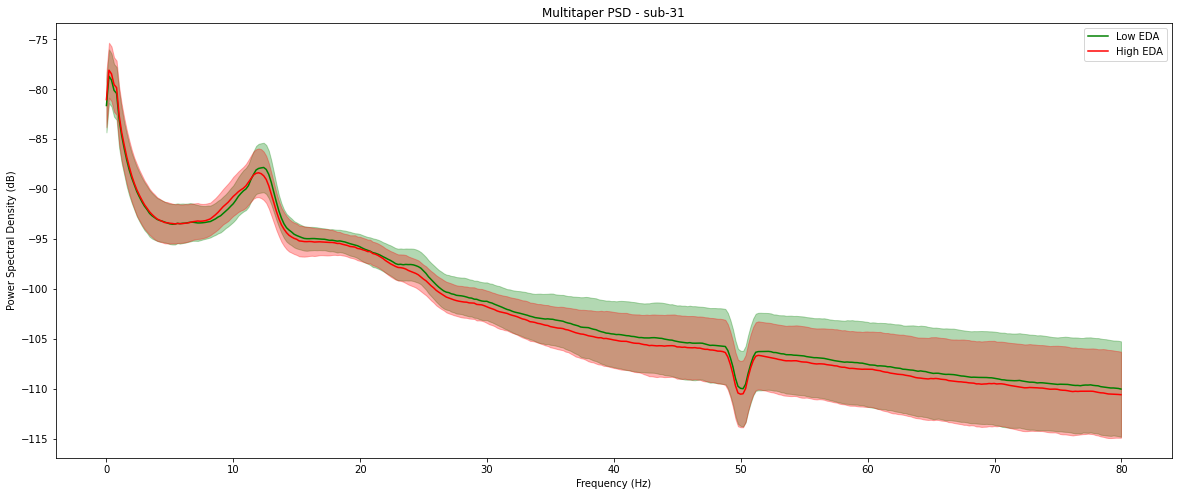

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-32\eeg\sub-32_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
594 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


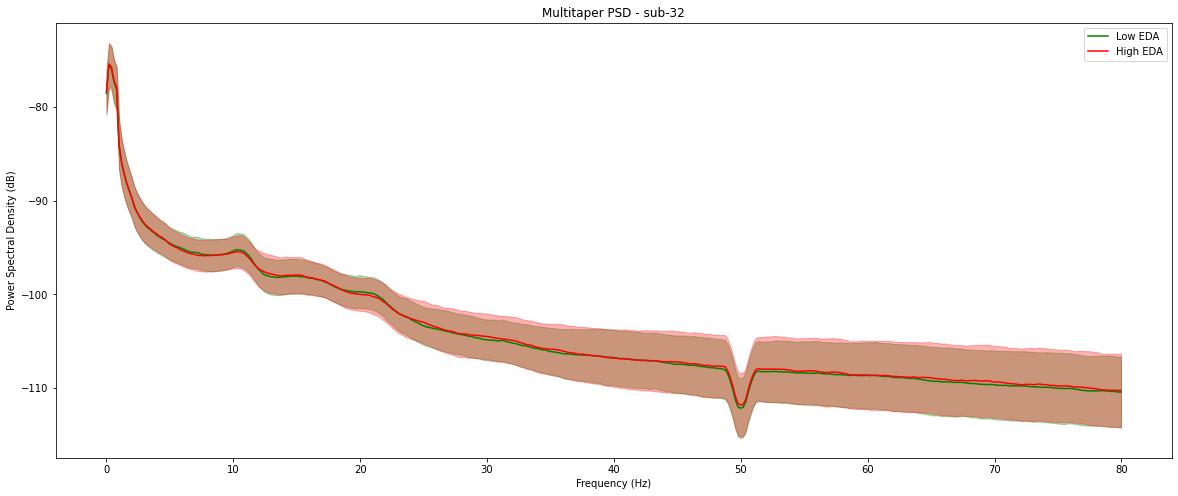

In [2]:
import mne
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import datetime
import importlib
import os
import os.path as op

import h5io

plt.rcParams['figure.figsize'] = [20, 8] 

dataset =  'deap'
config_map = {'deap': "config_deap_eeg"}

cfg = importlib.import_module(config_map[dataset])
bids_root = cfg.bids_root
deriv_root = cfg.deriv_root
analyze_channels = cfg.analyze_channels

condition = 'rest'
feature_label = 'fb_covs'

#########  SET CONFIGS #########

# eda or emg?    
measure = 'eda'
# var or mean?   
y_stat = 'var'

DEBUG = True

################################


derivative_path = deriv_root 
pred_path = derivative_path / f'{measure}_predictions'

#%%


date = datetime.datetime.now().strftime("%d-%m--%H-%M")    
n_components = np.arange(1, 32, 1)
seed = 42
n_splits = 5
n_jobs = -1
score_name, scoring = "r2", "r2"
cv_name = '5Fold'


features_y = h5io.read_hdf5(deriv_root / f'features_EDA_{condition}.h5')

#subjects = ['sub-01']

subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08',
            'sub-09', 'sub-10', 'sub-11', 'sub-12', 'sub-13', 'sub-14', 'sub-15', 'sub-16',
            'sub-17', 'sub-18', 'sub-19', 'sub-20', 'sub-21', 'sub-22', 'sub-23', 'sub-24',
            'sub-25', 'sub-26', 'sub-27', 'sub-28', 'sub-29', 'sub-30', 'sub-31', 'sub-32']

for subject in subjects:
       
       eda_features = [features_y[subject]]
       y = eda_features[0]['meanEDA_SMNA']
       
       idx_low_EDA = []
       idx_high_EDA = []
       for ii in range(len(y)-1):
              if y[ii] < np.percentile(y, 25):
                     idx_low_EDA.append(ii)
              elif y[ii] > np.percentile(y, 75):
                     idx_high_EDA.append(ii)
              
       number_subject = subject[-2:]
       
       f, ax = plt.subplots()
       extension = '.fif'
       directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
       fname_fif = op.join(directory, 'sub-' + number_subject , 'eeg',
                     'sub-' + number_subject + '_task-rest_proc-autoreject_epo' + extension)
       epochs = mne.read_epochs(fname_fif, preload=True)

       psds, freqs = mne.time_frequency.psd_multitaper(epochs[idx_low_EDA], fmin=0, fmax=80, n_jobs=1)
       psds = 10 * np.log10(psds)  # convert to dB
       psds_mean = psds.mean(0).mean(0)
       psds_std = psds.mean(0).std(0)

       ax.plot(freqs, psds_mean, color='g', label='Low EDA')
       ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                     color='g', alpha=.3)

       psds, freqs = mne.time_frequency.psd_multitaper(epochs[idx_high_EDA], fmin=0, fmax=80, n_jobs=1)
       psds = 10 * np.log10(psds)  # convert to dB
       psds_mean = psds.mean(0).mean(0)
       psds_std = psds.mean(0).std(0)

       ax.plot(freqs, psds_mean, color='r', label='High EDA')
       ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                     color='r', alpha=.3)

       ax.legend()

       ax.set(title=f'Multitaper PSD - {subject}', xlabel='Frequency (Hz)',
              ylabel='Power Spectral Density (dB)')
       plt.show()

In [ ]:
import mne
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import datetime
import importlib
import os
import os.path as op

import h5io

plt.rcParams['figure.figsize'] = [20, 8] 

dataset =  'deap'
config_map = {'deap': "config_deap_eeg"}

cfg = importlib.import_module(config_map[dataset])
bids_root = cfg.bids_root
deriv_root = cfg.deriv_root
analyze_channels = cfg.analyze_channels

condition = 'rest'
feature_label = 'fb_covs'

#########  SET CONFIGS #########

# eda or emg?    
measure = 'eda'
# var or mean?   
y_stat = 'var'

DEBUG = True

################################


derivative_path = deriv_root 
pred_path = derivative_path / f'{measure}_predictions'

#%%


date = datetime.datetime.now().strftime("%d-%m--%H-%M")    
n_components = np.arange(1, 32, 1)
seed = 42
n_splits = 5
n_jobs = -1
score_name, scoring = "r2", "r2"
cv_name = '5Fold'


features_y = h5io.read_hdf5(deriv_root / f'features_EDA_{condition}.h5')

#subjects = ['sub-01']

#subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08',
#            'sub-09', 'sub-10', 'sub-11', 'sub-12', 'sub-13', 'sub-14', 'sub-15', 'sub-16',
#            'sub-17', 'sub-18', 'sub-19', 'sub-20', 'sub-21', 'sub-22', 'sub-23', 'sub-24',
#            'sub-25', 'sub-26', 'sub-27', 'sub-28', 'sub-29', 'sub-30', 'sub-31', 'sub-32']

subjects = ['sub-01', 'sub-02']

for subject in subjects:
       
       eda_features = [features_y[subject]]
       y = eda_features[0]['meanEDA_SMNA']
       
       idx_low_EDA_aux = []
       idx_high_EDA_aux = []
       for ii in range(len(y)-1):
              if y[ii] < np.percentile(y, 25):
                     idx_low_EDA_aux.append(ii)
              elif y[ii] > np.percentile(y, 75):
                     idx_high_EDA_aux.append(ii)
              
       number_subject = subject[-2:]
       
       
       extension = '.fif'
       directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
       fname_fif = op.join(directory, 'sub-' + number_subject , 'eeg',
                     'sub-' + number_subject + '_task-rest_epo' + extension)
       epochs_aux = mne.read_epochs(fname_fif, preload=True)
       
       try:
              idx_low_EDA_aux = [i + len(epochs) for i in idx_low_EDA_aux]
              idx_low_EDA.append(idx_low_EDA_aux)
              idx_high_EDA_aux = [i + len(epochs) for i in idx_high_EDA_aux]
              idx_high_EDA.append(idx_high_EDA_aux)
              epochs_pre = epochs.copy()
              epochs =  mne.concatenate_epochs([epochs_aux, epochs_pre])

              
       except Exception:
              pass
       
       


In [25]:
print(y)

[2.06852935e+01 9.54781905e+01 9.54211679e+01 4.40687589e+01
 1.47642189e+01 3.85568643e+00 2.33432763e+01 1.01506767e+01
 1.18620636e+01 4.85781096e+00 1.02122153e+01 7.67413217e+00
 1.27796149e+01 1.02855945e+01 1.96128055e+01 2.86277079e+01
 1.45012526e+01 5.14324652e+00 3.74736794e+00 2.52077879e+01
 2.74611869e+01 1.30516227e+01 1.17304230e+01 1.20121550e+01
 2.67352281e+00 4.56058855e+00 1.22287766e+01 7.71050452e+00
 1.09423583e+01 1.21098337e+01 1.14171224e+01 4.98347951e+00
 8.17727221e+00 8.38276575e+00 1.95659112e+01 9.39547378e+00
 1.08698464e+01 1.16221548e+01 2.12938959e+01 4.66259805e+01
 3.89513414e+01 2.61213915e+01 1.08426152e+01 2.54155105e+00
 1.48400986e+01 1.04620996e+03 5.08683732e+02 2.97758949e+02
 1.74398005e+02 2.02795957e+02 1.33262086e+02 1.04555063e+02
 5.89821078e+01 4.46521665e+01 3.82265763e+01 3.86579791e+01
 2.95298230e+01 1.32865399e+01 3.80782383e+01 3.43441259e+01
 6.71358455e+01 4.73922446e+01 3.74098828e+01 2.25685312e+01
 2.73671031e+01 5.176820

In [22]:
print(epochs_aux[1].info['nchan'])
print(epochs_pre[1].info['nchan'])

50
32


In [26]:
import mne
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import datetime
import importlib
import os
import os.path as op

import h5io

plt.rcParams['figure.figsize'] = [20, 8] 

dataset =  'deap'
config_map = {'deap': "config_deap_eeg"}

cfg = importlib.import_module(config_map[dataset])
bids_root = cfg.bids_root
deriv_root = cfg.deriv_root
analyze_channels = cfg.analyze_channels

condition = 'rest'
feature_label = 'fb_covs'

#########  SET CONFIGS #########

# eda or emg?    
measure = 'eda'
# var or mean?   
y_stat = 'var'

DEBUG = True

################################


derivative_path = deriv_root 
pred_path = derivative_path / f'{measure}_predictions'

#%%


date = datetime.datetime.now().strftime("%d-%m--%H-%M")    
n_components = np.arange(1, 32, 1)
seed = 42
n_splits = 5
n_jobs = -1
score_name, scoring = "r2", "r2"
cv_name = '5Fold'


features_y = h5io.read_hdf5(deriv_root / f'features_EDA_{condition}.h5')

#subjects = ['sub-01']

subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08']
#            'sub-09', 'sub-10', 'sub-11', 'sub-12', 'sub-13', 'sub-14', 'sub-15', 'sub-16',
#            'sub-17', 'sub-18', 'sub-19', 'sub-20', 'sub-21', 'sub-22', 'sub-23', 'sub-24',
#            'sub-25', 'sub-26', 'sub-27', 'sub-28', 'sub-29', 'sub-30', 'sub-31', 'sub-32']

#subjects = ['sub-01', 'sub-02']



for subject in subjects:
        
        eda_features = [features_y[subject]]
        y = eda_features[0]['meanEDA_SMNA']
        
        idx_low_EDA_aux = []
        idx_high_EDA_aux = []
        for ii in range(len(y)-1):
            if y[ii] < np.percentile(y, 25):
                idx_low_EDA_aux.append(ii)
            elif y[ii] > np.percentile(y, 75):
                idx_high_EDA_aux.append(ii)
             
        number_subject = subject[-2:]
        
        
        extension = '.fif'
        directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
        fname_fif = op.join(directory, 'sub-' + number_subject , 'eeg',
                      'sub-' + number_subject + '_task-rest_epo' + extension)
        epochs_aux = mne.read_epochs(fname_fif, preload=True)
        
        try:
            idx_low_EDA_aux = [i + len(epochs) for i in idx_low_EDA_aux]
            idx_low_EDA.append(idx_low_EDA_aux)
        except Exception:
            pass
        
        try:
            idx_high_EDA_aux = [i + len(epochs) for i in idx_high_EDA_aux]
            idx_high_EDA.append(idx_high_EDA_aux)
        except Exception:
            pass
        
        try:
            epochs_now = epochs.copy()
            epochs = mne.concatenate_epochs([epochs_now, epochs_aux])
        except Exception:
            epochs = epochs_aux.copy()
            idx_low_EDA = idx_low_EDA_aux
            idx_high_EDA = idx_high_EDA_aux
        

from collections import Iterable
def flatten(lis):
    for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:        
            yield item

idx_low_EDA = list(flatten(idx_low_EDA))
idx_high_EDA = list(flatten(idx_high_EDA))


f, ax = plt.subplots()

psds, freqs = mne.time_frequency.psd_multitaper(epochs[idx_low_EDA], fmin=0, fmax=80, n_jobs=1)
psds = 10 * np.log10(psds)  # convert to dB
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

ax.plot(freqs, psds_mean, color='g', label='Low EDA')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
              color='g', alpha=.3)

psds, freqs = mne.time_frequency.psd_multitaper(epochs[idx_high_EDA], fmin=0, fmax=80, n_jobs=1)
psds = 10 * np.log10(psds)  # convert to dB
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

ax.plot(freqs, psds_mean, color='r', label='High EDA')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
              color='r', alpha=.3)

ax.legend()


Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-01\eeg\sub-01_task-rest_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
600 matching events found
No baseline correction applied
0 projection items activated


C:\Users\dadam\AppData\Local\Temp/ipykernel_1596/2509740751.py:103: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs([epochs_now, epochs_aux])


Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-02\eeg\sub-02_task-rest_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
602 matching events found
No baseline correction applied
0 projection items activated


C:\Users\dadam\AppData\Local\Temp/ipykernel_1596/2509740751.py:103: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs([epochs_now, epochs_aux])


Not setting metadata
1202 matching events found
No baseline correction applied
Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-03\eeg\sub-03_task-rest_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
600 matching events found
No baseline correction applied
0 projection items activated


C:\Users\dadam\AppData\Local\Temp/ipykernel_1596/2509740751.py:103: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs([epochs_now, epochs_aux])


Not setting metadata
1802 matching events found
No baseline correction applied
Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-04\eeg\sub-04_task-rest_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
601 matching events found
No baseline correction applied
0 projection items activated


C:\Users\dadam\AppData\Local\Temp/ipykernel_1596/2509740751.py:103: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs([epochs_now, epochs_aux])


Not setting metadata
2403 matching events found
No baseline correction applied
Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-05\eeg\sub-05_task-rest_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
602 matching events found
No baseline correction applied
0 projection items activated


C:\Users\dadam\AppData\Local\Temp/ipykernel_1596/2509740751.py:103: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs([epochs_now, epochs_aux])


Not setting metadata
3005 matching events found
No baseline correction applied
Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-06\eeg\sub-06_task-rest_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
600 matching events found
No baseline correction applied
0 projection items activated


C:\Users\dadam\AppData\Local\Temp/ipykernel_1596/2509740751.py:103: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs([epochs_now, epochs_aux])


Not setting metadata
3605 matching events found
No baseline correction applied
Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-07\eeg\sub-07_task-rest_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
600 matching events found
No baseline correction applied
0 projection items activated


C:\Users\dadam\AppData\Local\Temp/ipykernel_1596/2509740751.py:103: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs([epochs_now, epochs_aux])


Not setting metadata
4205 matching events found
No baseline correction applied
Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-08\eeg\sub-08_task-rest_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
600 matching events found
No baseline correction applied
0 projection items activated


C:\Users\dadam\AppData\Local\Temp/ipykernel_1596/2509740751.py:103: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs([epochs_now, epochs_aux])


In [23]:
subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05']

print(subjects[0][-2:])

01


In [18]:
epochs.info

<Info | 14 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 32 EEG
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dig: 35 items (3 Cardinal, 32 EEG)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 80.0 Hz
 meas_date: 2010-07-01 10:00:16 UTC
 meas_id: 4 items (dict)
 nchan: 32
 projs: Average EEG reference: on
 sfreq: 512.0 Hz
 subject_info: 3 items (dict)
>

Using matplotlib backend: Qt5Agg
Using matplotlib as 2D backend.


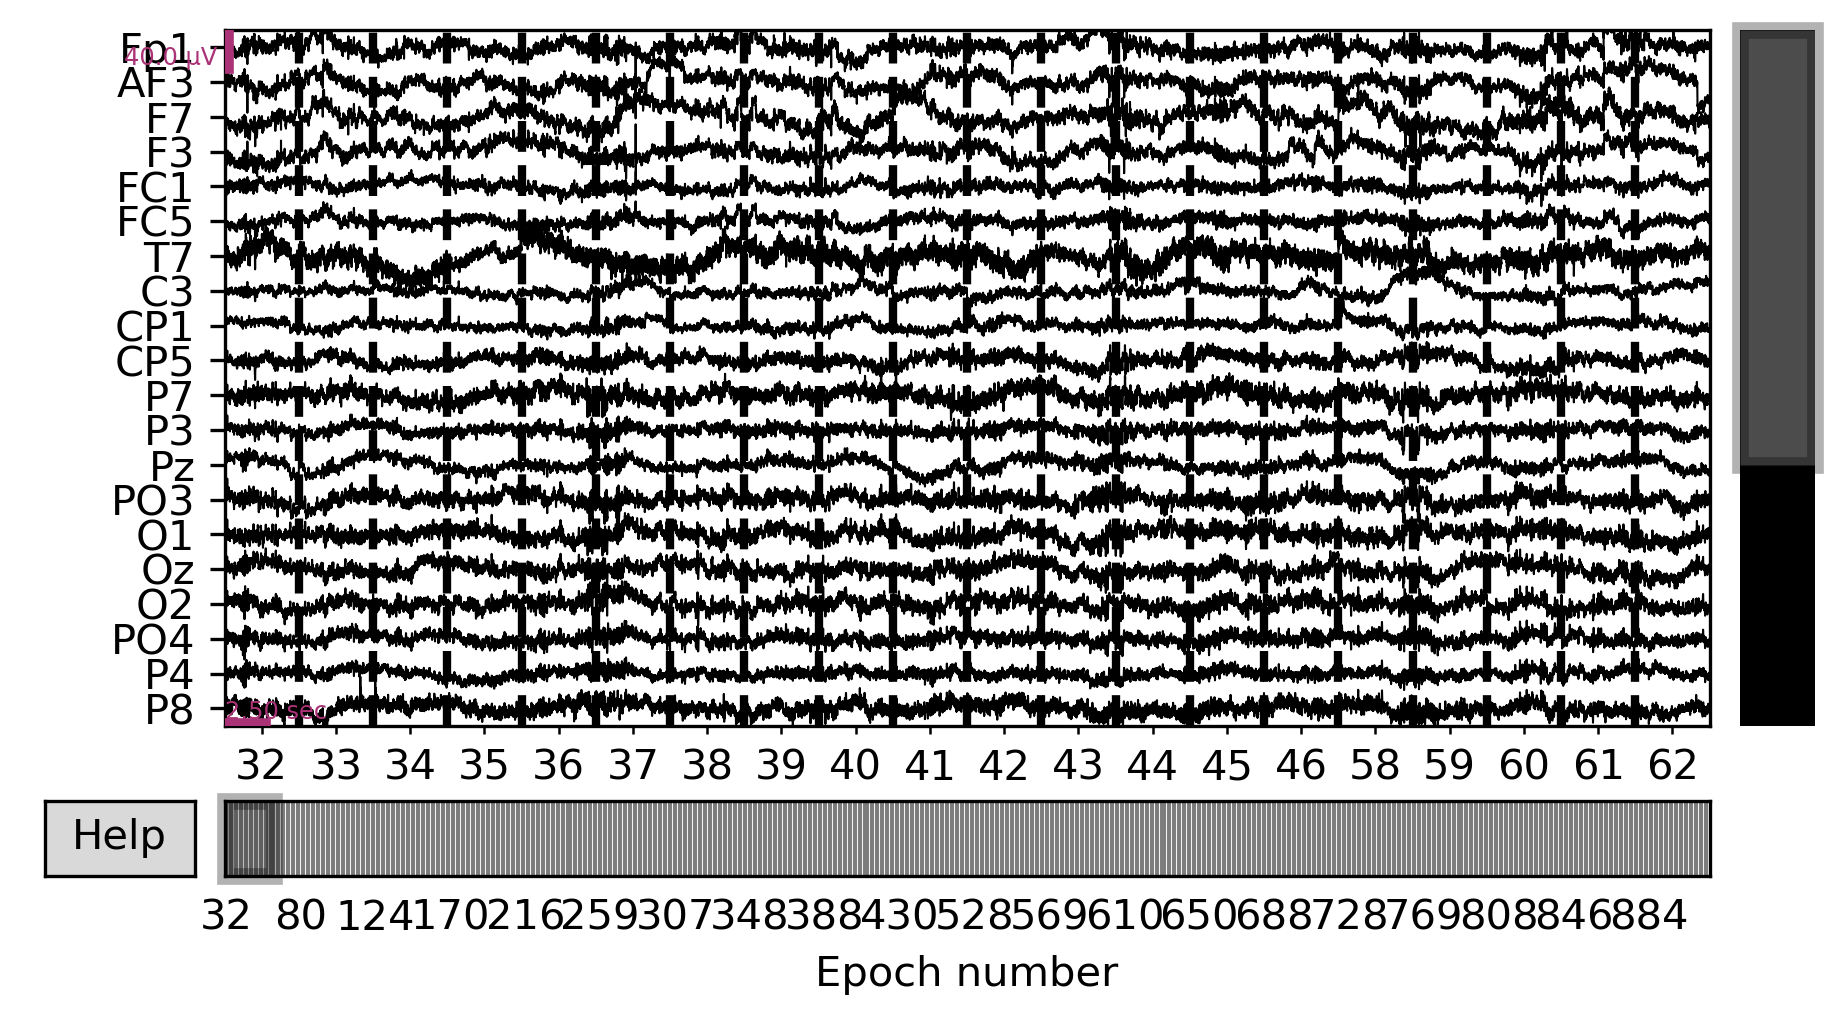

In [19]:
%matplotlib
epochs.plot()

In [20]:
epochs_846 = epochs[846]

IndexError: index 846 is out of bounds for axis 0 with size 595